#  $$ME 793 - Multiscale.Materials.Informatics, Discovery.and.Design$$ 
 #        $$Project :Automated.Computation.of.Material.Properties$$


### $$ Group: 1$$
### $$Bhanupratap .  Patel(22M1729) $$
### $$Md .Selim. Ahmed (22M1711)$$



### Importing libraries

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import seaborn as sns
import rfpimp



### Loading the data
#### Dataset of low alloy steel taken from Kaggle database
Dataset link :https://www.kaggle.com/datasets/nitinsharma21/mechanical-properties-of-low-alloy-steel

In [2]:
# load the dataset 
df = pd.read_csv("pmo.csv")
print(df.shape)
df.head()

(915, 18)


,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489


In [3]:
# Dataset is described 
df.describe()

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa)
count,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.00000
mean,0.174929,0.310918,0.812962,0.014543,0.010602,0.143016,0.427861,0.442870,0.079148,0.060190,0.012435,0.007652,0.093989,0.000041,351.601093,328.218579,489.69071
std,0.059674,0.086871,0.342775,0.005244,0.004024,0.172746,0.457568,0.394383,0.058481,0.096403,0.013067,0.002321,0.172533,0.000261,189.714773,131.653232,125.96744
min,0.090000,0.180000,0.420000,0.006000,0.003000,0.000000,0.000000,0.005000,0.000000,0.000000,0.002000,0.002500,0.000000,0.000000,27.000000,27.000000,162.00000
25%,0.130000,0.240000,0.500000,0.010000,0.008000,0.023000,0.040000,0.050000,0.040000,0.000000,0.004000,0.006200,0.000000,0.000000,200.000000,220.000000,413.00000
50%,0.160000,0.300000,0.680000,0.014000,0.010000,0.050000,0.110000,0.500000,0.070000,0.000000,0.006000,0.007600,0.000000,0.000000,400.000000,290.000000,479.00000
75%,0.200000,0.370000,1.210000,0.018000,0.012000,0.210000,1.000000,0.560000,0.110000,0.070000,0.016000,0.009000,0.000000,0.000000,500.000000,432.500000,575.00000
max,0.340000,0.520000,1.480000,0.030000,0.022000,0.600000,1.310000,1.350000,0.250000,0.300000,0.050000,0.015000,0.437000,0.001700,650.000000,690.000000,830.00000


### Feature Selection

In [4]:
# Independent Variables
X = pd.get_dummies(df.drop([' Tensile Strength (MPa)','Alloy code',' 0.2% Proof Stress (MPa)'] ,axis=1))
# Dependent variables
Y = df[[' 0.2% Proof Stress (MPa)',' Tensile Strength (MPa)']]

### Splitting the data into test and train data

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

# Mult-Variate Regression Model

In [6]:
model = LinearRegression().fit(X_train,Y_train)
Y_pre = model.predict(X_test)
r_sq = r2_score(Y_test,Y_pre)

# R-square value
print('coefficient of determination:', r_sq)

# Biases
print('intercept:', model.intercept_)

# Weight vectors
print('slope:', model.coef_)

# predicting the properties based on input data(X_test)
y_predict = model.predict(X_test)

# print predicted values
print(y_predict)

coefficient of determination: 0.7478973030839536
intercept: [205.41040508 469.02115499]
slope: [[ 1.34281897e+02  1.42188069e+02  6.55082778e+01 -8.67770721e+01
   4.08158708e+01  9.46135415e+01 -1.22907068e+00  1.49321137e+02
  -2.59215907e+01  4.14901320e+02  6.93641403e+01 -1.68606398e+03
   3.07276431e+02  3.40438429e+04 -3.31471819e-01]
 [ 2.57645055e+02  4.56481910e+01  2.52189630e+01  2.33052760e+02
  -7.20442932e+01  3.79090488e+01 -1.16733017e+01  1.23635591e+02
  -1.13655767e+02  2.77227007e+02  1.25257495e+02 -1.65285581e+02
   2.22034162e+02  7.08211038e+04 -4.21644781e-01]]
[[199.57660024 377.19766901]
 [385.00911386 596.2910522 ]
 [240.01956199 430.42695816]
 [205.96675695 390.11967514]
 [447.55134739 561.25542627]
 [341.21576522 575.47932569]
 [261.37012542 439.01754884]
 [239.51599931 491.78610269]
 [531.30852763 657.90912752]
 [349.8044315  559.71898646]
 [344.33396202 576.54250084]
 [343.36406665 453.08834938]
 [166.41486384 377.95922187]
 [123.5154408  320.74465686]


In [7]:
lm = LinearRegression()
scores = cross_val_score(lm, X_train, Y_train, scoring='r2', cv=5)
scores.mean()

0.7604668051697947

### Using KFold to cross-validate the model accuracy

In [8]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, Y_train, scoring='r2', cv=folds)

# take mean of all 5 split accuracy
scores.mean()  

0.7621120920904499

In [9]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 20))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, Y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, Y_train)    

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19]}],
             return_train_score=True, scoring='r2', verbose=1)

In [10]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022046,0.001524,0.004027,6.342386e-04,1,{'n_features_to_select': 1},-0.000170,-0.000084,-0.006916,-0.024882,...,-0.004806,0.011098,18,0.006628,0.006730,0.005132,0.006760,0.004108,0.005872,0.001073
1,0.022208,0.001389,0.004230,4.123419e-04,2,{'n_features_to_select': 2},-0.000459,0.000710,-0.007426,-0.027943,...,-0.007113,0.010806,19,0.007324,0.007439,0.052181,0.007899,0.006106,0.016190,0.018006
2,0.018927,0.000370,0.003999,6.641573e-07,3,{'n_features_to_select': 3},0.051356,-0.001741,-0.013960,0.016019,...,0.025380,0.033257,17,0.056650,0.007581,0.055654,0.059137,0.049928,0.045790,0.019341
3,0.017276,0.001102,0.003799,7.504608e-04,4,{'n_features_to_select': 4},0.055450,-0.002635,0.328526,0.019982,...,0.096620,0.119516,16,0.060623,0.007634,0.409947,0.063123,0.053194,0.118904,0.146910
4,0.017805,0.000746,0.003902,6.610019e-04,5,{'n_features_to_select': 5},0.054557,0.357252,0.332288,0.021434,...,0.167887,0.145611,15,0.060647,0.323125,0.415070,0.063358,0.055089,0.183458,0.154361
5,0.016128,0.000475,0.003921,1.557601e-04,6,{'n_features_to_select': 6},0.428725,0.429535,0.357622,0.387503,...,0.395946,0.028729,13,0.395385,0.405255,0.429542,0.403039,0.407362,0.408117,0.011452
6,0.014961,0.000417,0.003857,4.470380e-04,7,{'n_features_to_select': 7},0.413105,0.438271,0.357395,0.385544,...,0.396761,0.027271,12,0.408931,0.410820,0.429546,0.432799,0.414609,0.419341,0.009886
7,0.014776,0.000317,0.004361,4.470380e-04,8,{'n_features_to_select': 8},0.415514,0.441771,0.362310,0.370260,...,0.392364,0.030935,14,0.413004,0.415157,0.469435,0.435594,0.433655,0.433369,0.020259
8,0.012759,0.000650,0.004488,7.683342e-04,9,{'n_features_to_select': 9},0.434247,0.484265,0.363132,0.393965,...,0.410290,0.044098,11,0.426889,0.439628,0.470938,0.451214,0.438918,0.445517,0.014859
9,0.012494,0.000731,0.004222,4.447247e-04,10,{'n_features_to_select': 10},0.467004,0.485675,0.368294,0.400589,...,0.425891,0.043694,10,0.452425,0.441863,0.481764,0.454546,0.464407,0.459001,0.013448


### Cross-validation plot

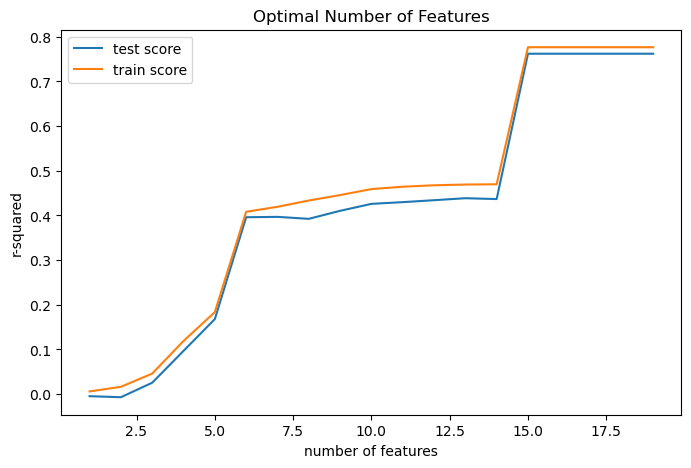

In [11]:
# plotting cv results
plt.figure(figsize=(8,5))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

### Important feature selection

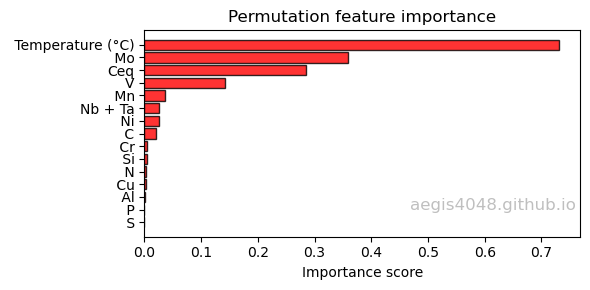

In [12]:
imp = rfpimp.importances(lm, X_test, Y_test)
fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='r', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
ax.text(0.8, 0.15, 'aegis4048.github.io', fontsize=12, ha='center', va='center',
        transform=ax.transAxes, color='grey', alpha=0.5)
plt.gca().invert_yaxis()

fig.tight_layout()

### Multi-variate regression model error and accuracy

In [13]:
# Calculate the absolute errors
errors = abs(Y_pre - Y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error:  0.2% Proof Stress (MPa)    36.46
 Tensile Strength (MPa)     63.26
dtype: float64 degrees.
Accuracy:  0.2% Proof Stress (MPa)    86.85
 Tensile Strength (MPa)     85.33
dtype: float64 %.


C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


### Visualizing the results

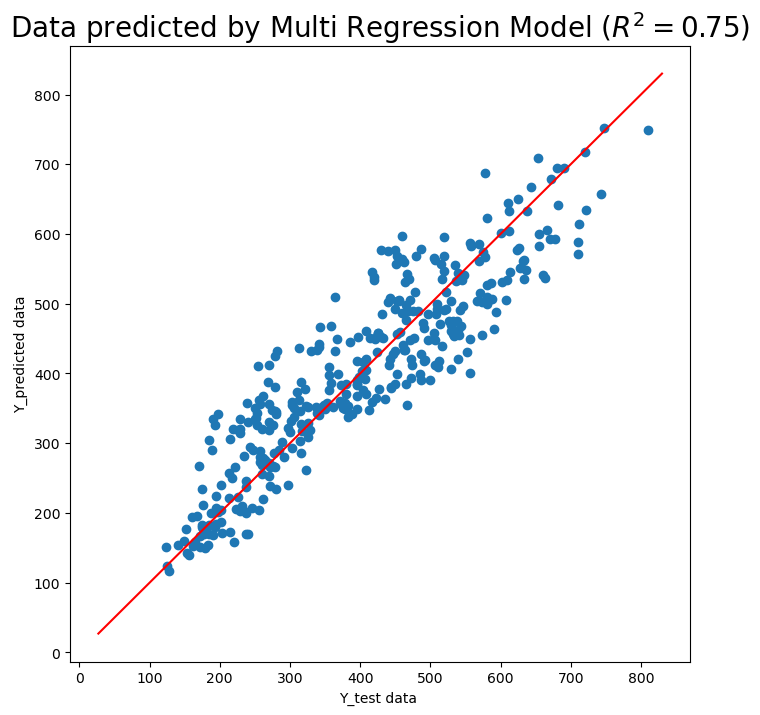

In [14]:
%matplotlib inline
A = np.linspace(27,830,10)
B = np.linspace(27,830,10)
fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(Y_test,Y_pre)
ax.set_xlabel('Y_test data ')
ax.set_ylabel('Y_predicted data')
ax.set_title('Data predicted by Multi Regression Model ($R^2 = %.2f$)' % r_sq, fontsize=20)
ax.plot(A,B,color= 'r')
plt.show()

# Random Forest Model

In [15]:
# Load scikit's random forest regression library
from sklearn.ensemble import RandomForestRegressor

# Load pandas
import pandas as pd

# Load numpy
import numpy as np

# Set random seed
np.random.seed(0)



# Create a random forest Regressor. By convention, rf means 'Regressor'
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)


# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
rf.fit(X_train, Y_train)

# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
y_predict = rf.predict(X_test)

r_sq1= r2_score(Y_test,y_predict)
print('R square value :',r_sq1)



R square value : 0.9620132079128796


### Random Forest errors and accuracy

In [16]:
# Calculate the absolute errors
errors = abs(y_predict - Y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error:  0.2% Proof Stress (MPa)    18.67
 Tensile Strength (MPa)     15.85
dtype: float64 degrees.
Accuracy:  0.2% Proof Stress (MPa)    93.56
 Tensile Strength (MPa)     96.56
dtype: float64 %.


C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


### Important Features

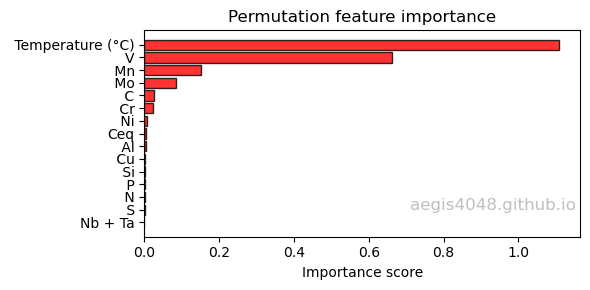

In [17]:
############################### Permutation feature importance #####################################

imp = rfpimp.importances(rf, X_test, Y_test)

############################################## Plot ################################################

fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='r', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
ax.text(0.8, 0.15, 'aegis4048.github.io', fontsize=12, ha='center', va='center',
        transform=ax.transAxes, color='grey', alpha=0.5)
plt.gca().invert_yaxis()

fig.tight_layout()

### Visualizing the RF results

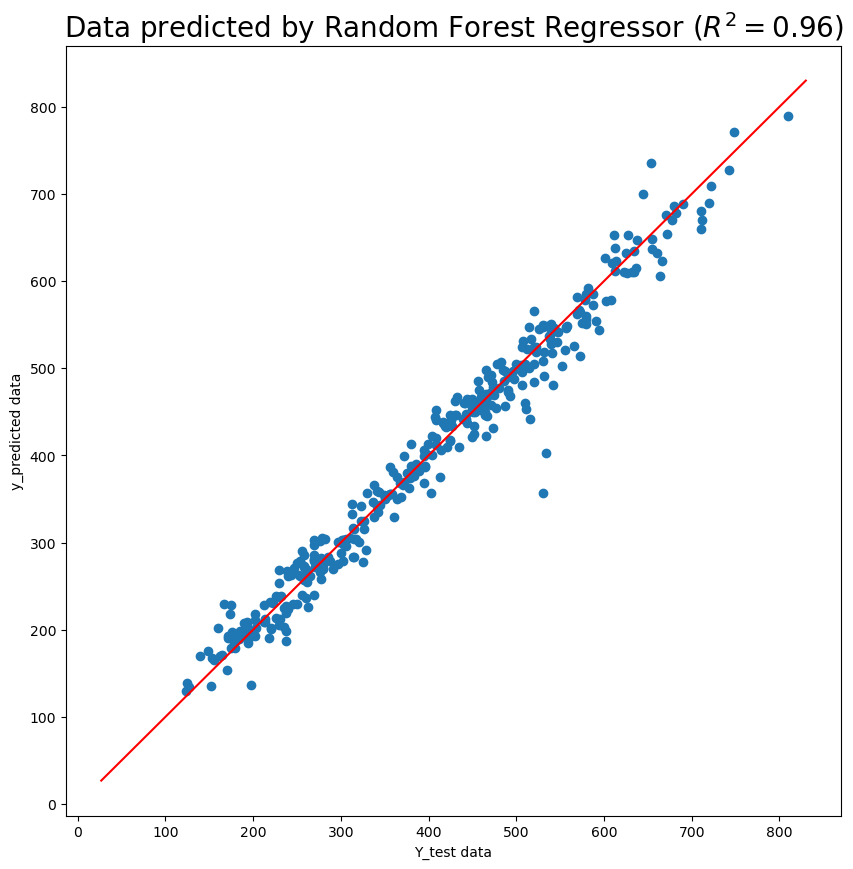

In [18]:
%matplotlib inline
A = np.linspace(27,830,10)
B = np.linspace(27,830,10)
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(Y_test,y_predict)
ax.set_xlabel('Y_test data')
ax.set_ylabel('y_predicted data')
ax.plot(A,B,color = 'r')
ax.set_title('Data predicted by Random Forest Regressor ($R^2 = %.2f$)' % r_sq1, fontsize=20)
plt.show()


### Cross-validating the results to see model is overfitting or underfitting 

In [4]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(rf, X_train, Y_train, scoring='r2', cv=folds)
print(scores)
print(scores.mean())

NameError: name 'KFold' is not defined

In [20]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 1)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 10))}]


# step-3: perform grid search
# 3.1 specify model
rf.fit(X_train, Y_train)
rfe = RFE(rf)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, Y_train)    

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RFE(estimator=RandomForestRegressor(n_jobs=-1)),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             return_train_score=True, scoring='r2', verbose=1)

In [21]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.576278,0.088688,0.044174,0.001608,1,{'n_features_to_select': 1},0.376684,0.327417,0.342973,0.333946,...,0.339517,0.020482,9,0.399567,0.351133,0.409921,0.410495,0.417394,0.397702,0.023970
1,7.972250,0.076829,0.048680,0.004819,2,{'n_features_to_select': 2},0.807385,0.797108,0.810541,0.812543,...,0.808416,0.006124,8,0.842358,0.852015,0.845477,0.848019,0.846792,0.846932,0.003165
2,7.559391,0.467319,0.051030,0.006071,3,{'n_features_to_select': 3},0.843964,0.890307,0.868738,0.907272,...,0.880930,0.022260,7,0.962488,0.962464,0.961067,0.956719,0.961422,0.960832,0.002132
3,6.571982,0.147460,0.047362,0.001928,4,{'n_features_to_select': 4},0.918205,0.942584,0.904220,0.927423,...,0.927245,0.014974,6,0.986899,0.987022,0.988211,0.989363,0.987403,0.987780,0.000915
4,5.980662,0.059451,0.047170,0.002785,5,{'n_features_to_select': 5},0.931394,0.954510,0.919044,0.946779,...,0.940062,0.012988,5,0.992813,0.990620,0.992129,0.992032,0.990664,0.991652,0.000867
5,5.438319,0.230946,0.048014,0.002707,6,{'n_features_to_select': 6},0.932794,0.958517,0.923361,0.954734,...,0.944463,0.013826,4,0.992780,0.991276,0.992753,0.991916,0.991963,0.992138,0.000568
6,4.782028,0.106759,0.046917,0.001942,7,{'n_features_to_select': 7},0.934653,0.959495,0.926647,0.952612,...,0.944910,0.012245,2,0.992400,0.991753,0.992602,0.992324,0.991807,0.992177,0.000337
7,4.213696,0.038759,0.047826,0.002622,8,{'n_features_to_select': 8},0.934585,0.959369,0.923433,0.954673,...,0.945072,0.013729,1,0.992508,0.991396,0.993272,0.992329,0.991591,0.992219,0.000674
8,3.674252,0.046332,0.049073,0.003926,9,{'n_features_to_select': 9},0.934494,0.959679,0.922551,0.953229,...,0.944598,0.013866,3,0.992409,0.990981,0.992342,0.991628,0.991683,0.991809,0.000525


### Cross-validation plot

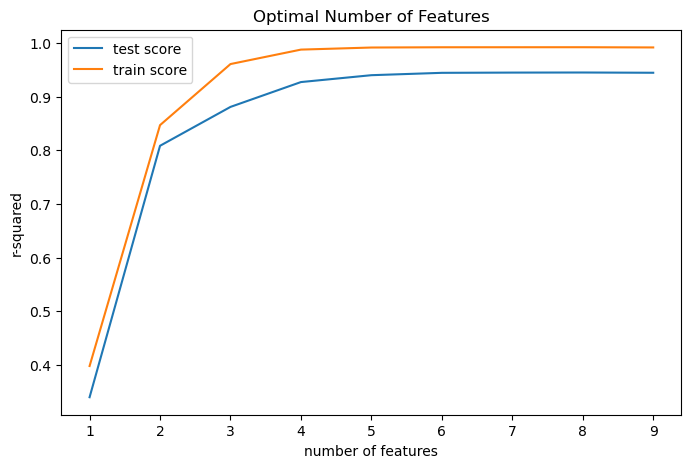

In [22]:
 # plotting cv results
plt.figure(figsize=(8,5))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

## $$**********END*********$$